In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.svm import SVC

In [26]:
mat = loadmat("dado1.mat")
X = mat["X"]
y = mat["y"]

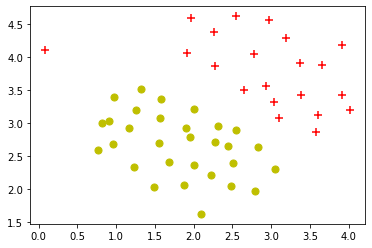

In [27]:
m,n = X.shape[0],X.shape[1]
pos,neg = (y==1).reshape(m,1),(y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

## Máquinas de Vetores de Suporte - Linear

In [28]:
classifier = SVC(kernel="linear")
classifier.fit(X,np.ravel(y))
classifier_50 = SVC(C=50,kernel="linear")
classifier_50.fit(X,np.ravel(y))
classifier_100 = SVC(C=100,kernel="linear")
classifier_100.fit(X,np.ravel(y))

SVC(C=100, kernel='linear')

(1.5, 5.0)

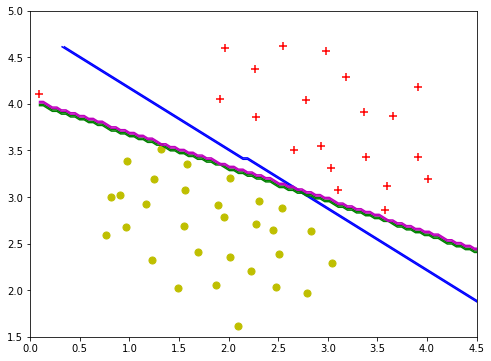

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.contour(X_1,X_2,classifier_50.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="g")
plt.contour(X_1,X_2,classifier_100.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="m")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

## Máquinas de Vetores de Suporte - Gaussiano

In [30]:
mat = loadmat("dado2.mat")
X2 = mat["X"]
y2 = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]

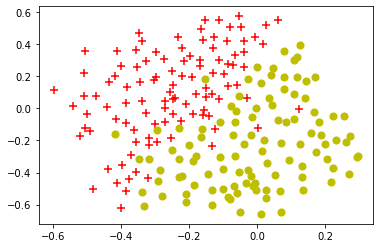

In [31]:
m,n = X2.shape[0],X2.shape[1]
pos,neg = (y2==1).reshape(m,1),(y2==0).reshape(m,1)
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="y",marker="o",s=50)

In [32]:
classifier = SVC(kernel="rbf")
classifier.fit(X2,np.ravel(y2))

SVC()

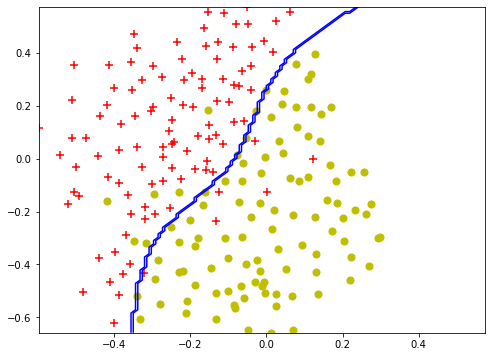

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="y",marker="o",s=50)

X_1,X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
#plt.ylim(-4.5,4.5)
#plt.xlim(-6.5,5)

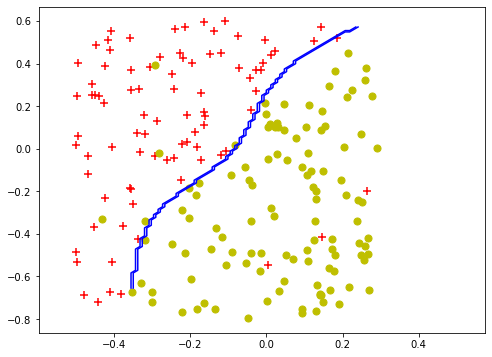

In [79]:
classifier = SVC(kernel="rbf")
classifier.fit(X2,np.ravel(y2))

m,n = Xval.shape[0],Xval.shape[1]
pos,neg = (yval==1).reshape(m,1),(yval==0).reshape(m,1)
plt.figure(figsize=(8,6))
plt.scatter(Xval[pos[:,0],0],Xval[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(Xval[neg[:,0],0],Xval[neg[:,0],1],c="y",marker="o",s=50)

_X_1,_X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(_X_1,_X_2,classifier.predict(np.array([_X_1.ravel(),_X_2.ravel()]).T).reshape(_X_1.shape),1,colors="b")
#plt.xlim(-4.5,4.5)
#plt.ylim(-6.5,5)

## C e \gamma ideais 

In [75]:
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], "gamma": [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
svm = SVC(kernel="rbf")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(X2,np.ravel(y2))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]})

In [76]:
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 30, 'gamma': 3}
CV Score with best parameter values: 0.9194905869324475


In [77]:
# Tabela com os testes
df = pd.DataFrame(search.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001998,0.000002,0.000799,0.000400,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.860465,0.5,0.5,0.5,0.5,0.572093,0.144186,52
1,0.001797,0.000747,0.000599,0.000489,0.01,0.03,"{'C': 0.01, 'gamma': 0.03}",0.860465,0.5,0.5,0.5,0.5,0.572093,0.144186,52
2,0.001202,0.000406,0.000000,0.000000,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.860465,0.5,0.5,0.5,0.5,0.572093,0.144186,52
3,0.001404,0.000487,0.000795,0.000398,0.01,0.3,"{'C': 0.01, 'gamma': 0.3}",0.883721,0.5,0.5,0.5,0.5,0.576744,0.153488,47
4,0.001393,0.000482,0.000602,0.000492,0.01,1,"{'C': 0.01, 'gamma': 1}",0.860465,0.5,0.5,0.5,0.5,0.572093,0.144186,52


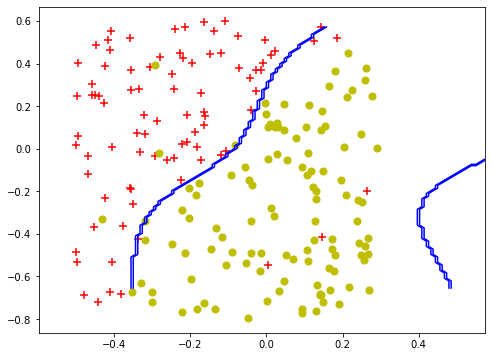

In [78]:
best_svm = search.best_estimator_ #SVC(kernel="rbf",gamma=3,C=30)
best_svm.fit(X2,np.ravel(y2))

m,n = Xval.shape[0],Xval.shape[1]
pos,neg = (yval==1).reshape(m,1),(yval==0).reshape(m,1)
plt.figure(figsize=(8,6))
plt.scatter(Xval[pos[:,0],0],Xval[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(Xval[neg[:,0],0],Xval[neg[:,0],1],c="y",marker="o",s=50)

X_1,X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_1,X_2,best_svm.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
#plt.xlim(-4.5,4.5)
#plt.ylim(-6.5,5)